Statistic analysis to start comparation betweens two similars clubs. First of all, we obtain the correct path to the respective experiments.   

In [213]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [214]:
#Define path to the experiments
Barcelona = "../Data/FCBarcelona/ThirdStage/finalMetadataBarcelona.csv"

In [215]:
try:
    # Read the CSV files into DataFrames
    metadataBarcelona = pd.read_csv(Barcelona, sep=",")

    # Now metadataManUnited and metadataManCity contain the data from the CSV files
except FileNotFoundError:
    print("One of the files does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", str(e))


In [216]:
print(metadataBarcelona)

    IdFiles ScoringTeam Score NoInformation  totalPasses  completePasses  \
0     101_1   Barcelona   1_0           NaN        159.0           152.0   
1     101_2   Barcelona   2_0           NaN        167.0           153.0   
2     101_3     Sevilla   2_1           NaN         41.0            36.0   
3     101_4     Sevilla   2_2           NaN        302.0           272.0   
4     101_5         NaN   NaN            NF         76.0            72.0   
..      ...         ...   ...           ...          ...             ...   
164    98_1   Barcelona   1_0           NaN        250.0           224.0   
165    98_2   Barcelona   2_0           NaN        146.0           130.0   
166    98_3   Barcelona   3_0           NaN        186.0           179.0   
167    98_4   Barcelona   4_0           NaN        103.0            94.0   
168    98_5         NaN   NaN            NF          NaN             NaN   

     incompletePasses  
0                 7.0  
1                14.0  
2              

In [217]:
goalsBarcelona = metadataBarcelona[metadataBarcelona["ScoringTeam"] == "Barcelona"]
print(goalsBarcelona)

    IdFiles ScoringTeam Score NoInformation  totalPasses  completePasses  \
0     101_1   Barcelona   1_0           NaN        159.0           152.0   
1     101_2   Barcelona   2_0           NaN        167.0           153.0   
5     108_1   Barcelona   1_0           NaN         12.0            12.0   
6     108_2   Barcelona   2_0           NaN        667.0           611.0   
8     115_1   Barcelona   1_0           NaN        222.0           207.0   
..      ...         ...   ...           ...          ...             ...   
162    95_1   Barcelona   1_0           NaN        465.0           406.0   
164    98_1   Barcelona   1_0           NaN        250.0           224.0   
165    98_2   Barcelona   2_0           NaN        146.0           130.0   
166    98_3   Barcelona   3_0           NaN        186.0           179.0   
167    98_4   Barcelona   4_0           NaN        103.0            94.0   

     incompletePasses  
0                 7.0  
1                14.0  
5              

In [218]:
uniqueScores = goalsBarcelona["Score"].unique()

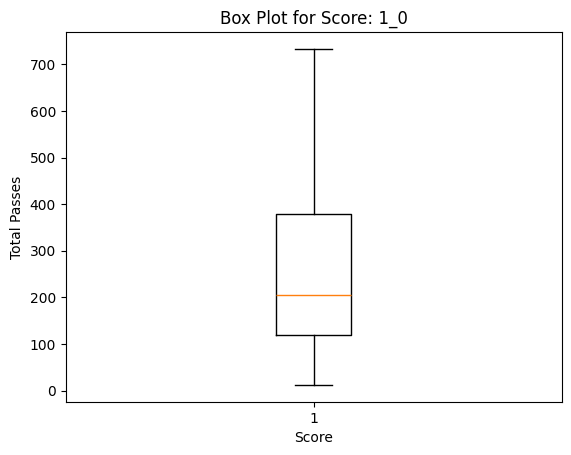

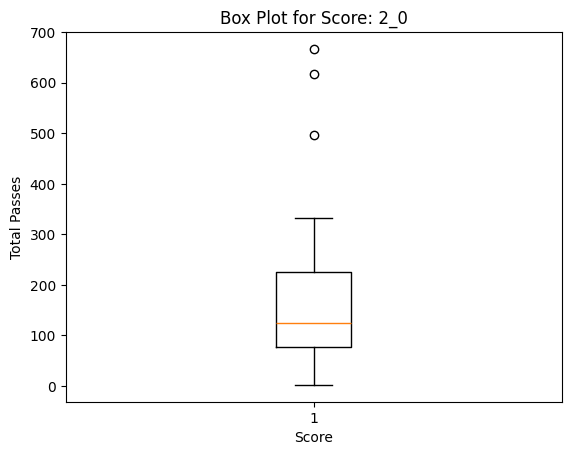

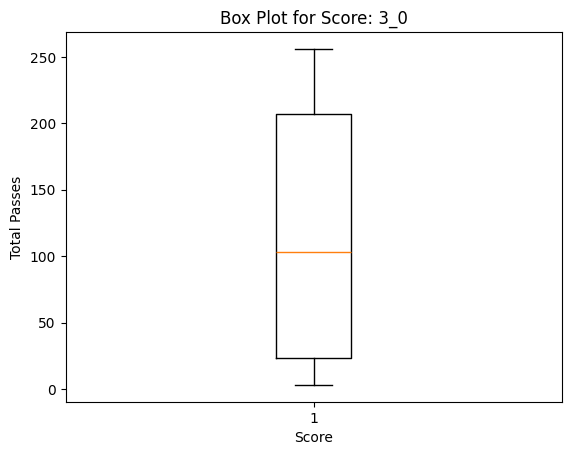

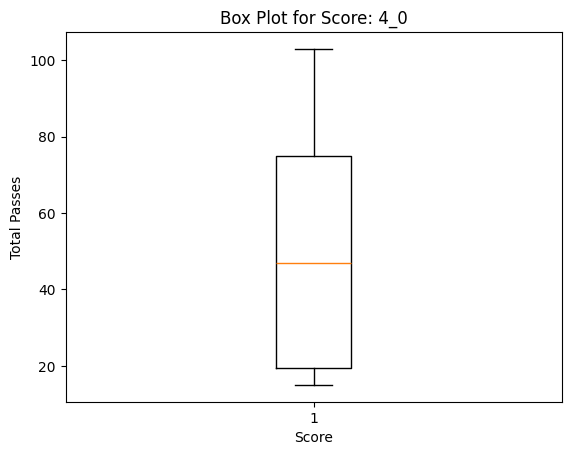

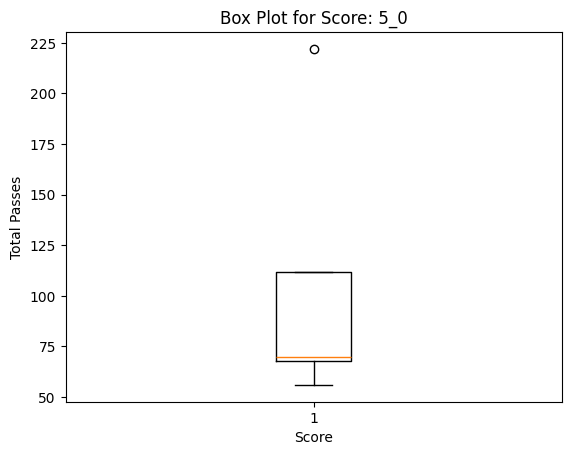

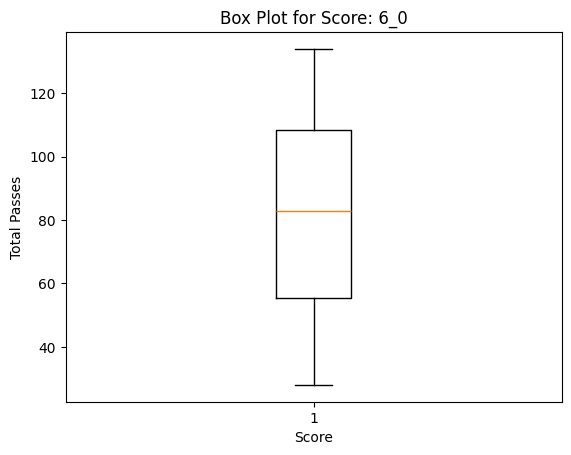

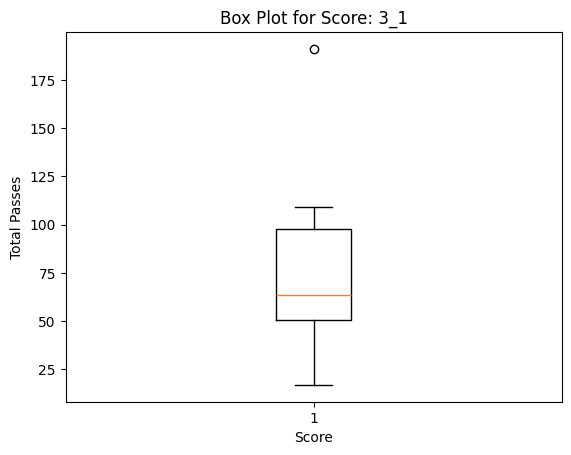

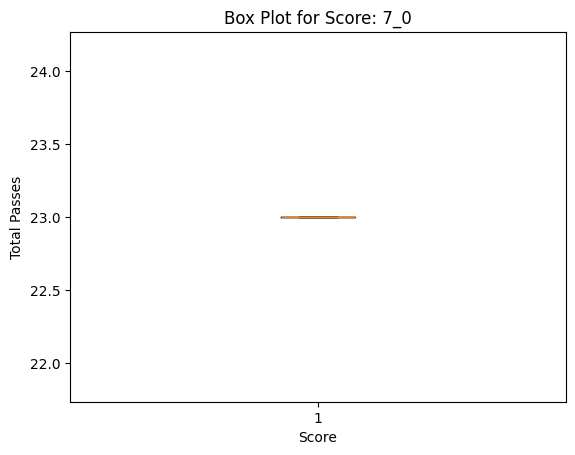

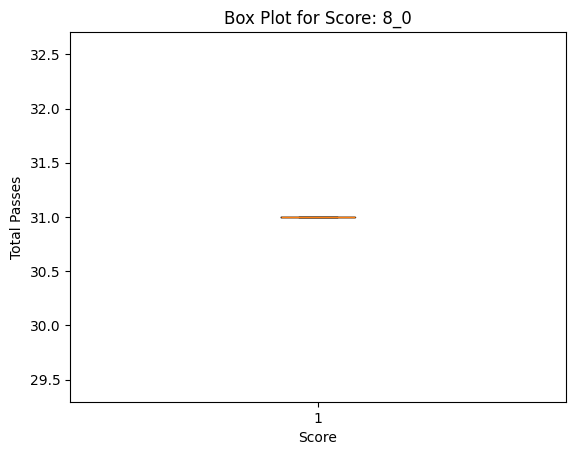

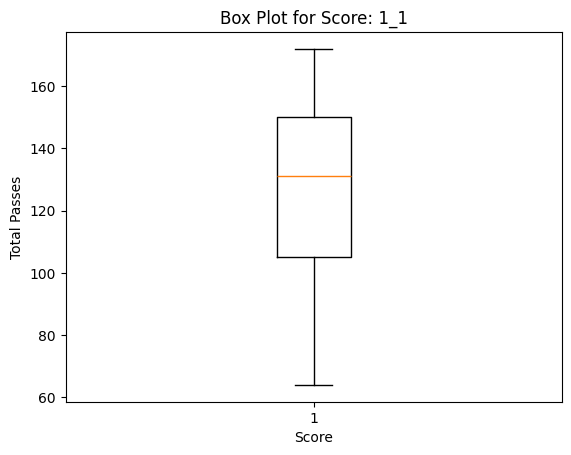

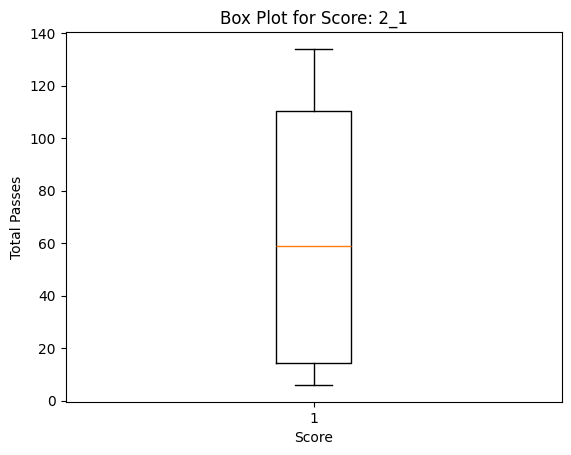

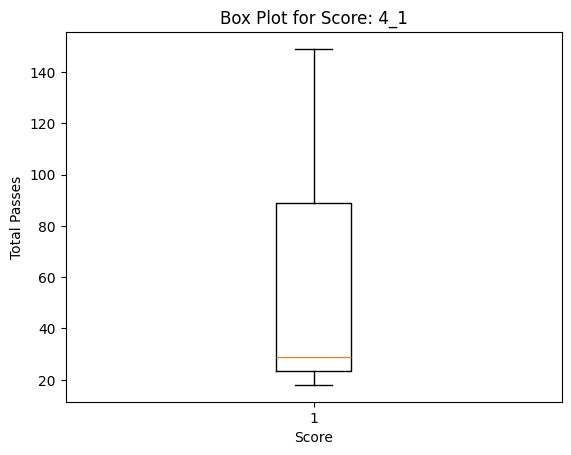

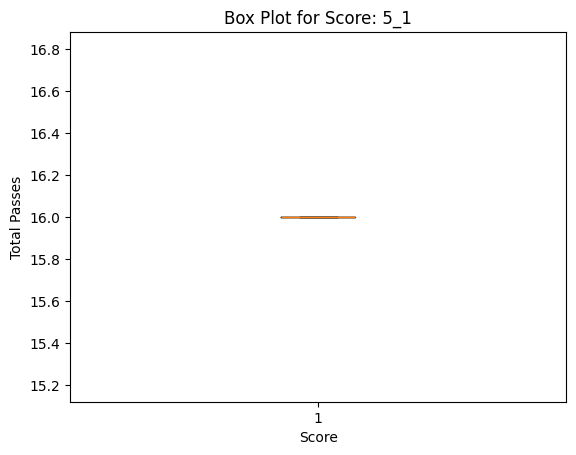

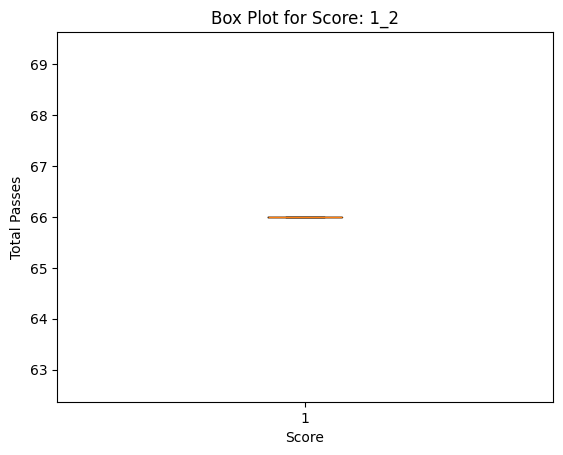

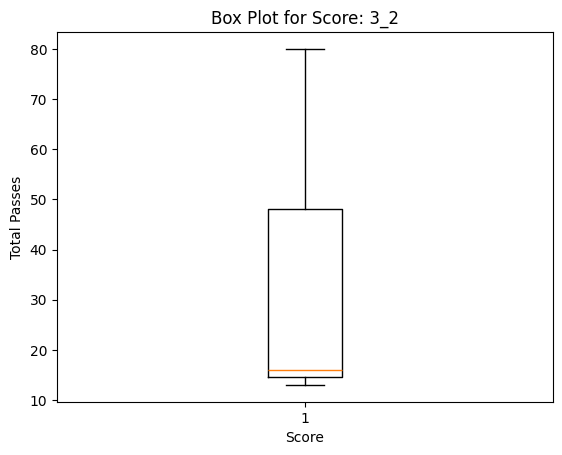

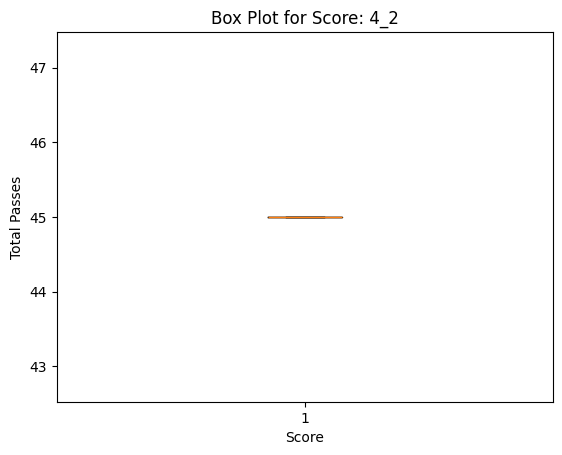

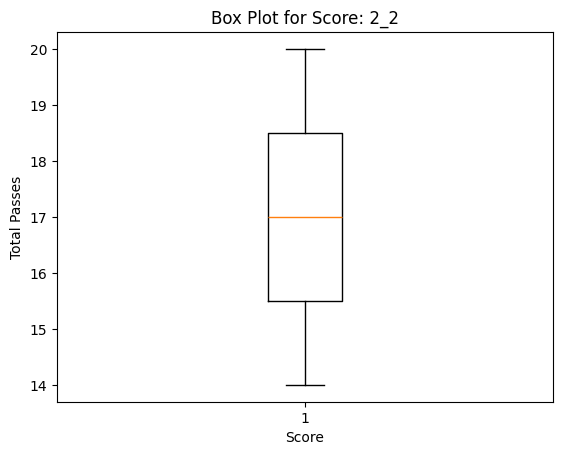

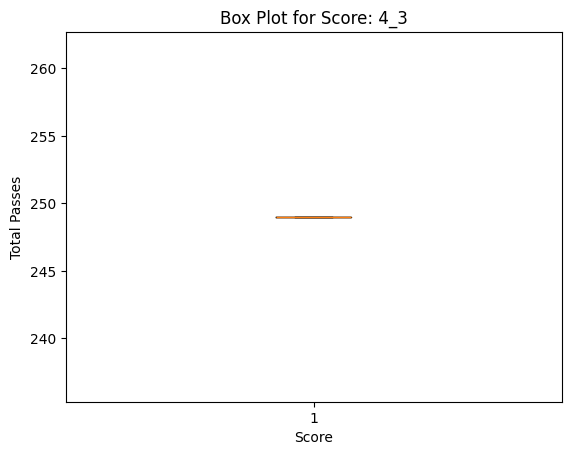

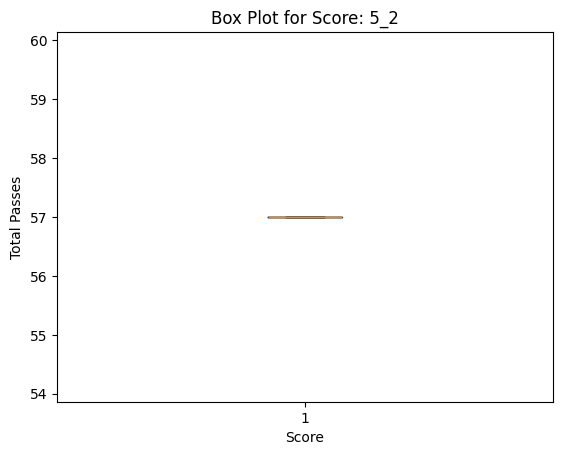

In [219]:

for score in uniqueScores:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(goalsBarcelona[goalsBarcelona['Score'] == score]['totalPasses'])
    
    # Set labels for x-axis and y-axis
    plt.xlabel('Score')  # Add label for x-axis
    plt.ylabel('Total Passes')  # Add label for y-axis
    
    # Add title for the box plot (optional)
    plt.title(f'Box Plot for Score: {score}') 
    
    # Show the plot
    plt.show()
    

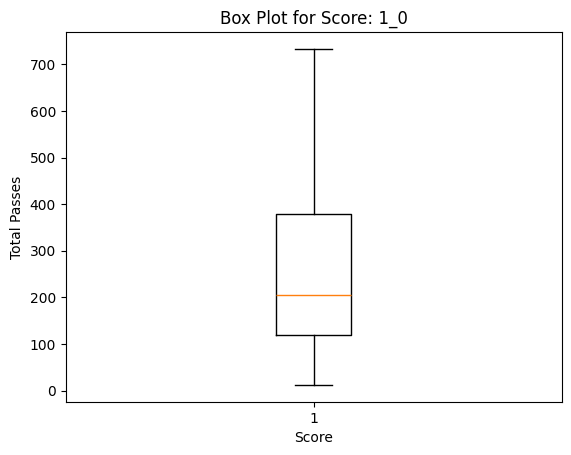

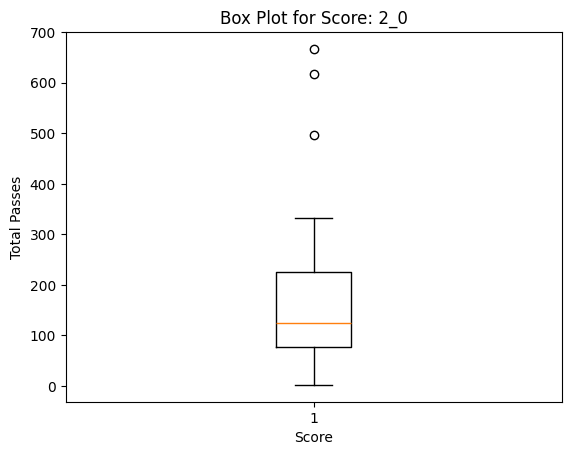

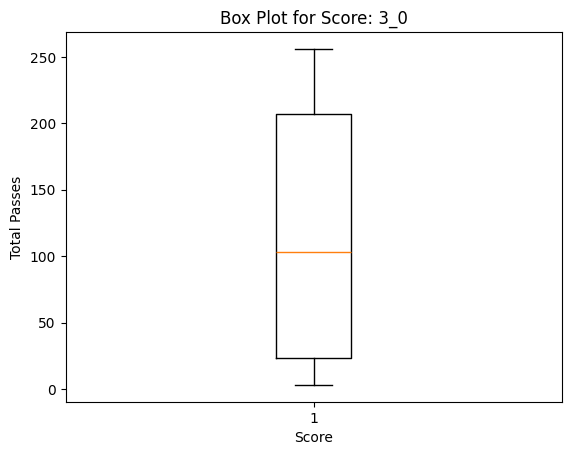

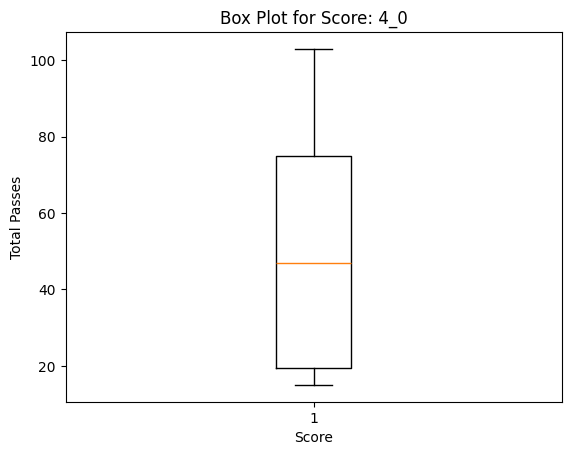

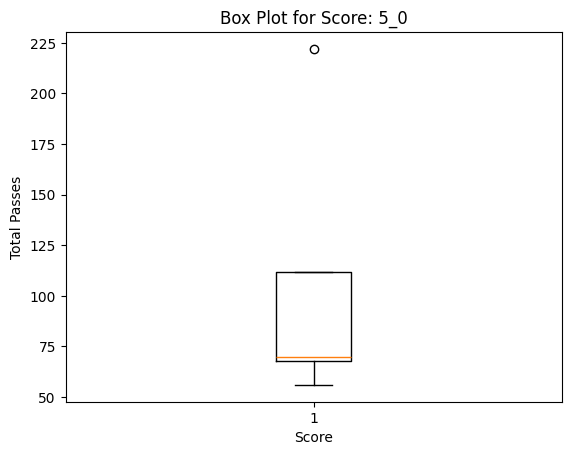

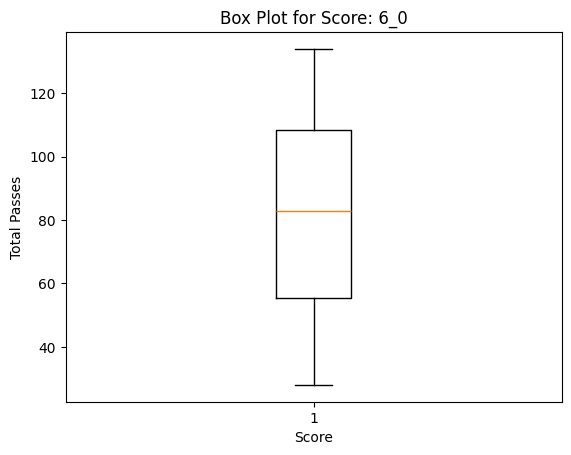

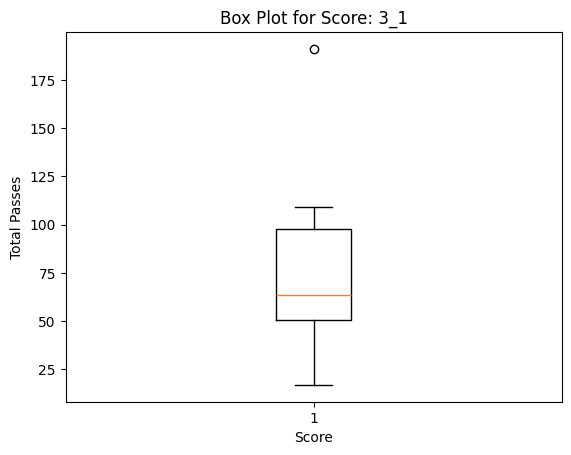

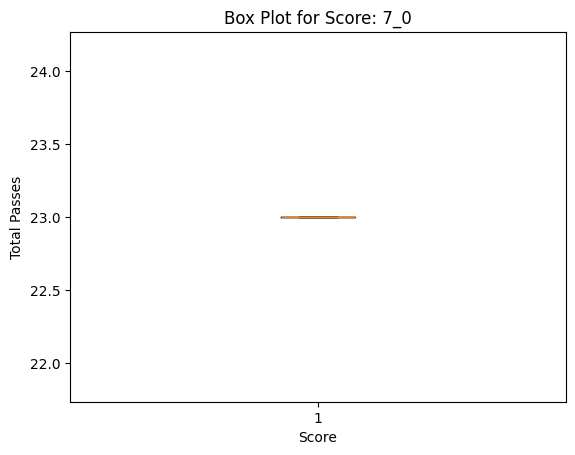

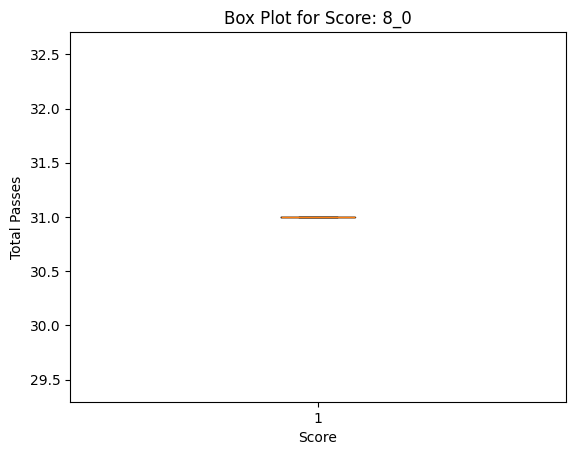

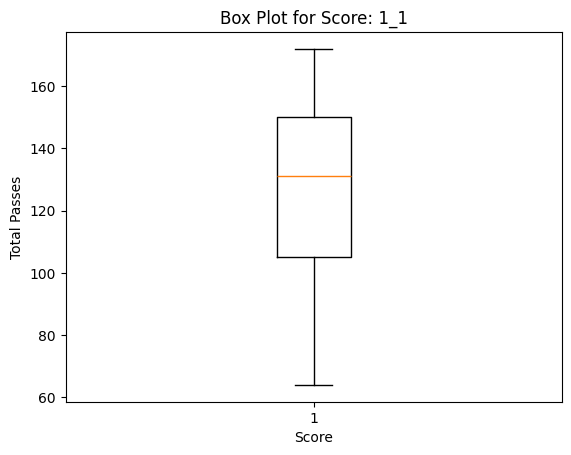

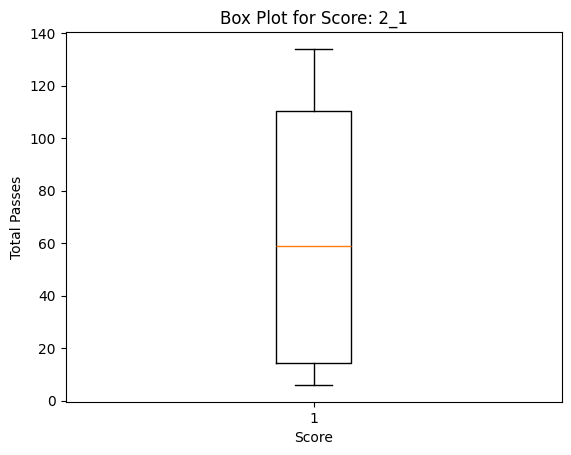

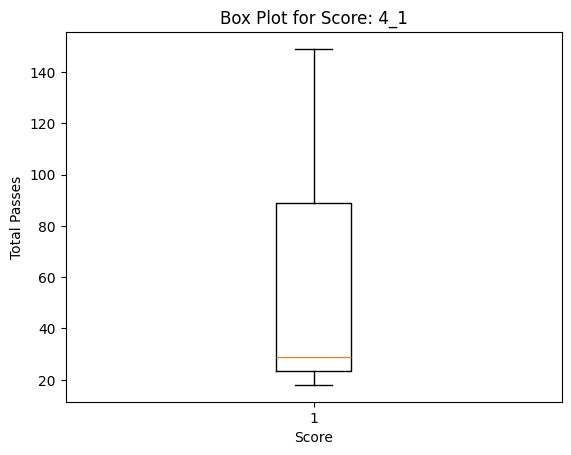

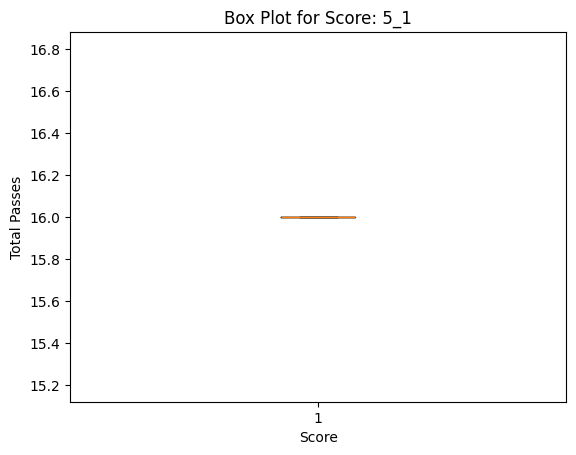

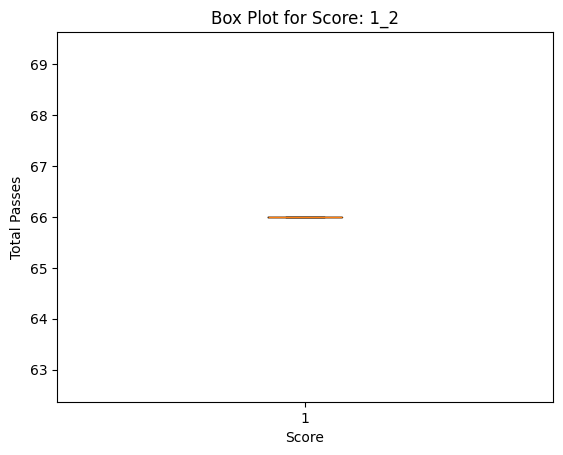

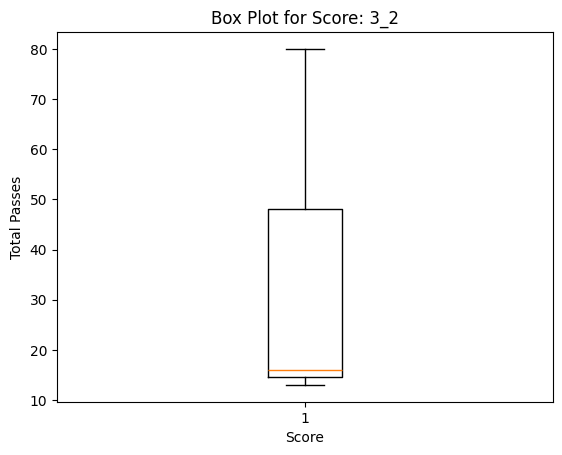

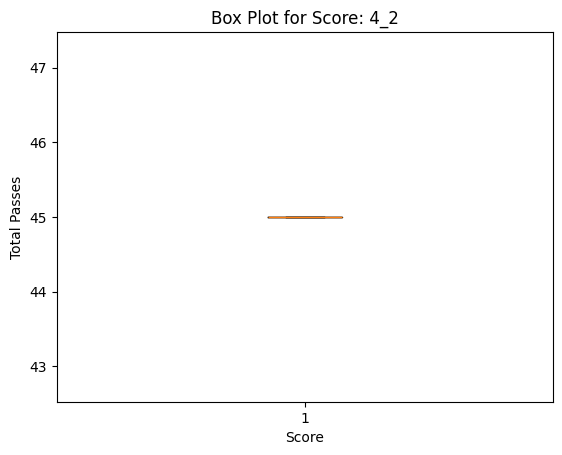

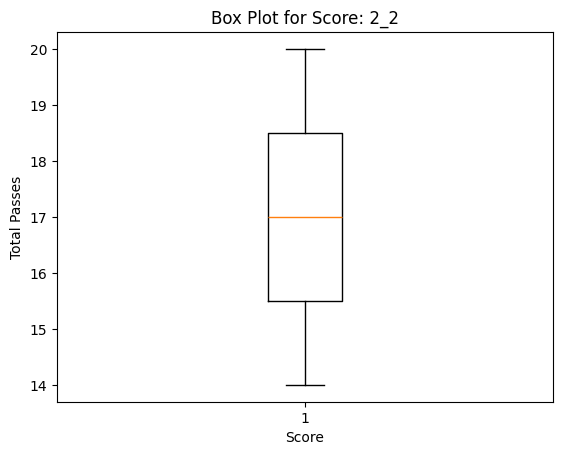

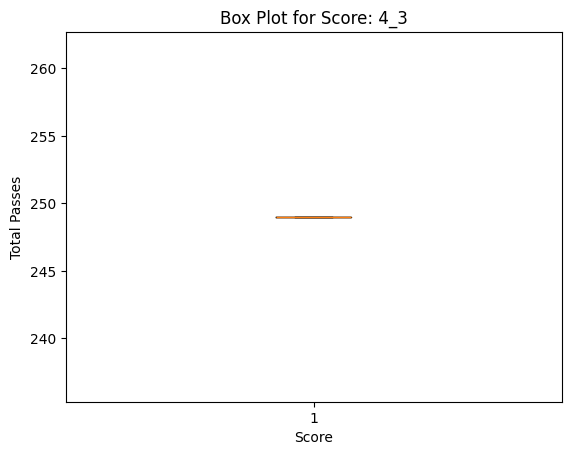

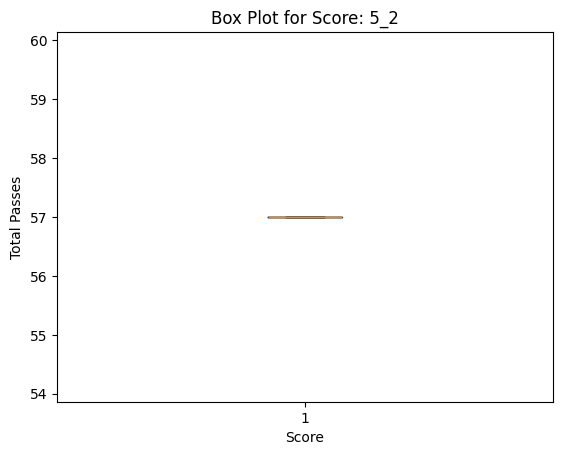

In [220]:
# Iterate over unique scores
for score in uniqueScores:
    # Create a new figure for each box plot
    plt.figure()
    
    # Create a box plot for the current score
    plt.boxplot(goalsBarcelona[goalsBarcelona['Score'] == score]['totalPasses'])
    
    # Set labels for x-axis and y-axis
    plt.xlabel('Score')  # Add label for x-axis
    plt.ylabel('Total Passes')  # Add label for y-axis
    
    # Add title for the box plot (optional)
    plt.title(f'Box Plot for Score: {score}') 
    
    # Show the plot
    plt.show()